Loading data...
Processing missing data...
Data after processing missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           72274 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 72274 non-null  float64
 8   upload_avg                   72274 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None
D

c:\Users\kdrajok\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8070 - loss: 0.4230 - val_accuracy: 0.8982 - val_loss: 0.2504
Epoch 2/50
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.8964 - loss: 0.2654 - val_accuracy: 0.9153 - val_loss: 0.2173
Epoch 3/50
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.9063 - loss: 0.2357 - val_accuracy: 0.9224 - val_loss: 0.1914
Epoch 4/50
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9138 - loss: 0.2068 - val_accuracy: 0.9241 - val_loss: 0.1655
Epoch 5/50
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9174 - loss: 0.1887 - val_accuracy: 0.9451 - val_loss: 0.1438
Epoch 6/50
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9314 - loss: 0.1719 - val_accuracy: 0.9478 - val_loss: 0.1321
Epoch 7/50
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9375 - loss: 0.1675 - val_accuracy: 0.9553 - val_loss: 0.1197
Epoch 8/50
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9427 - loss: 0.1527 - val

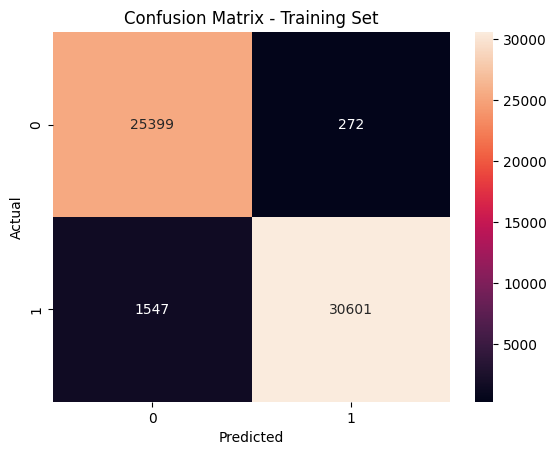

Test Set Evaluation:
Accuracy: 0.97
Recall: 0.95
Precision: 0.99
F1 Score: 0.97


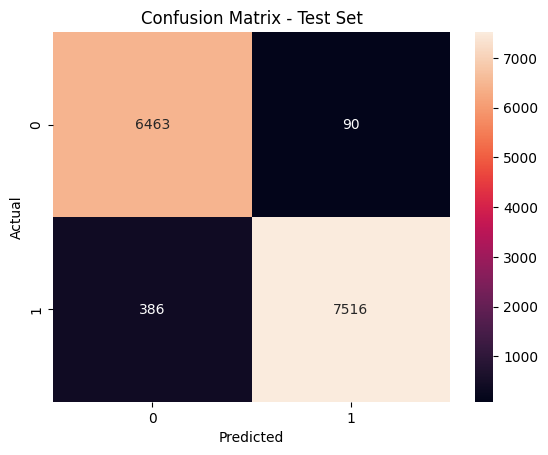

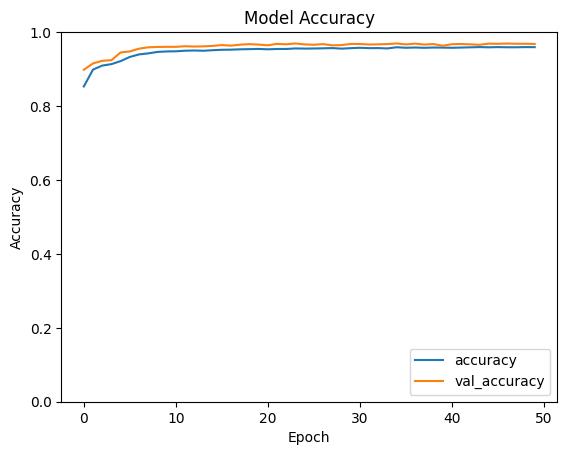

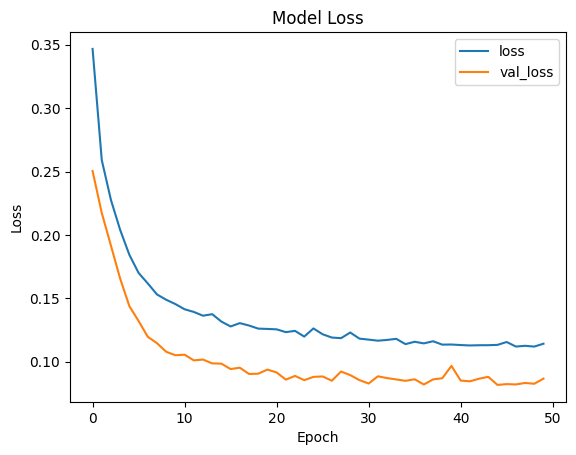

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
print("Loading data...")
data = pd.read_csv('./data/internet_service_churn.csv')

# 2. Handling Missing Data
print("Processing missing data...")

def process_missing_data(df, threshold=3):
    """
    Function to process missing data.
    If a row has 3 or fewer missing values, they are filled with mean values.
    If a row has more than 3 missing values, it is dropped.
    """
    # Drop rows where the number of missing values exceeds the threshold
    df.dropna(thresh=len(df.columns) - threshold, inplace=True)
    
    # Fill remaining missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    df[:] = imputer.fit_transform(df)
    
    return df

# Process missing data
data = process_missing_data(data)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

print("Data after processing missing values:")
print(data.info())

# 3. Data Preparation for Modeling

# Splitting data into features (X) and target variable (y)
X = data.drop(columns=['churn'])
y = data['churn']

# Encoding categorical variables (if any) before converting to NumPy arrays
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Now convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Ensure that X and y are of the correct data types
print("Data types after conversion:")
print(f"X dtype: {X.dtype}")
print(f"y dtype: {y.dtype}")

# Convert to specific data types if necessary
X = X.astype(np.float64)
y = y.astype(np.int64)

# Normalizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Train-Test Split
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Building the Neural Network

model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 6. Training the Model

print("Training the model...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 7. Evaluating the Model

print("Evaluating the model...")
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_train = (y_pred_train > 0.5).astype(int)
y_pred_test = (y_pred_test > 0.5).astype(int)

def evaluate_model(y_true, y_pred, dataset_type="Test"):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{dataset_type} Set Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {dataset_type} Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate on training set
evaluate_model(y_train, y_pred_train, "Training")

# Evaluate on test set
evaluate_model(y_test, y_pred_test)

# 8. Plotting Training History

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()